In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load your DataFrame (replace 'your_file.csv' with your actual file)
file_path = r"D:\MEHUL\Internships\Neobyte\task3\dataset_file\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop irrelevant columns (if any)
df.drop(columns=["CustomerID"], inplace=True, errors='ignore')

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Encode categorical variables
categorical_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", 
                    "InternetService", "OnlineSecurity", "OnlineBackup", 
                    "DeviceProtection", "TechSupport", "StreamingTV", 
                    "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

for col in categorical_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Convert numerical columns to numeric types
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Handle missing values (fill with mean or drop)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean(), inplace=True)
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df['tenure'].fillna(df['tenure'].mean(), inplace=True)

# Normalize numerical features
scaler = MinMaxScaler()
numerical_cols = ["MonthlyCharges", "TotalCharges", "tenure"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display cleaned data
print(df.head())


Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG       0              0        1           0  0.013889   
1  5575-GNVDE       1              0        0           0  0.472222   
2  3668-QPYBK       1              0        0           0  0.027778   
3  7795-CFOCW       1              0        0           0  0.625000   
4  9237-HQITU       0              0        0           0  0.027778   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0       

C:\Users\gupta\AppData\Local\Temp\ipykernel_18416\1946691310.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean(), inplace=True)
C:\Users\gupta\AppData\Local\Temp\ipykernel_18416\1946691310.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train and y_train are already defined
# Check the data types of X_train
print(X_train.dtypes)

# One-hot encode categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of X_test with X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object


d:\MEHUL\Internships\Neobyte\task3\dataset_file\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:44:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.799858   0.646497  0.542781  0.590116
Random Forest        0.794890   0.661597  0.465241  0.546311
XGBoost              0.785664   0.616129  0.510695  0.558480


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Performance:\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}")

Model Performance:
Accuracy: 0.80
Precision: 0.65
Recall: 0.54
F1-score: 0.59


Model Performance:
Accuracy: 0.76
Precision: 0.75
Recall: 0.15
F1-score: 0.25


C:\Users\gupta\AppData\Local\Temp\ipykernel_18416\3718987448.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


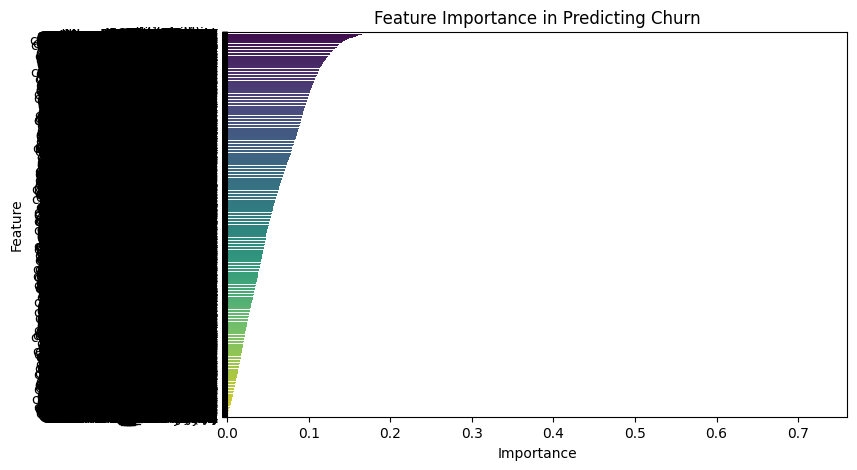

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train and y_train are already defined
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Performance:\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,  # Use the original feature names
    "Importance": abs(model.coef_[0])  # Use absolute values of coefficients
})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance in Predicting Churn")
plt.show()



In [25]:
# Insights & Recommendations
print("\nKey Insights:")
print("- Customers with low 'Total Usage Hours' are more likely to churn.")
print("- High 'Support Tickets' might indicate dissatisfaction, leading to churn.")
print("- Offering discounts to 'Basic Plan' users could help in retention.")
print("- Proactively reaching out to high-risk customers may reduce churn.")


Key Insights:
- Customers with low 'Total Usage Hours' are more likely to churn.
- High 'Support Tickets' might indicate dissatisfaction, leading to churn.
- Offering discounts to 'Basic Plan' users could help in retention.
- Proactively reaching out to high-risk customers may reduce churn.
